In [1]:
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D

from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_train[0].shape, 'image shape')

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples
(28, 28) image shape


In [4]:
# Agregar una dimension
x_train = x_train[:, :, :, np.newaxis]
x_test = x_test[:, :, :, np.newaxis]

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_train[0].shape, 'image shape')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
(28, 28, 1) image shape


In [5]:
# convertir clases a matrices
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [6]:
# Normalización
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

![LeNet-5](http://media5.datahacker.rs/2018/11/LeNet5-1024x188.png)

In [7]:
# LeNet-5 model
class LeNet(Sequential):
  def __init__(self, input_shape, nb_classes):
    super().__init__()

    self.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=input_shape, padding="same"))
    self.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
    self.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
    self.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
    self.add(Flatten())
    self.add(Dense(120, activation='tanh'))
    self.add(Dense(84, activation='tanh'))
    self.add(Dense(nb_classes, activation='softmax'))

    self.compile(optimizer='adam',
                loss=categorical_crossentropy,
                metrics=['accuracy'])

In [8]:
model = LeNet(x_train[0].shape, num_classes)

In [9]:
model.summary()

Model: "le_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               48120

In [10]:
model.fit(x_train, y=y_train,
          epochs=5,
          validation_data=(x_test, y_test),
          verbose=0)

313/313 [==============================] - 1s 2ms/step


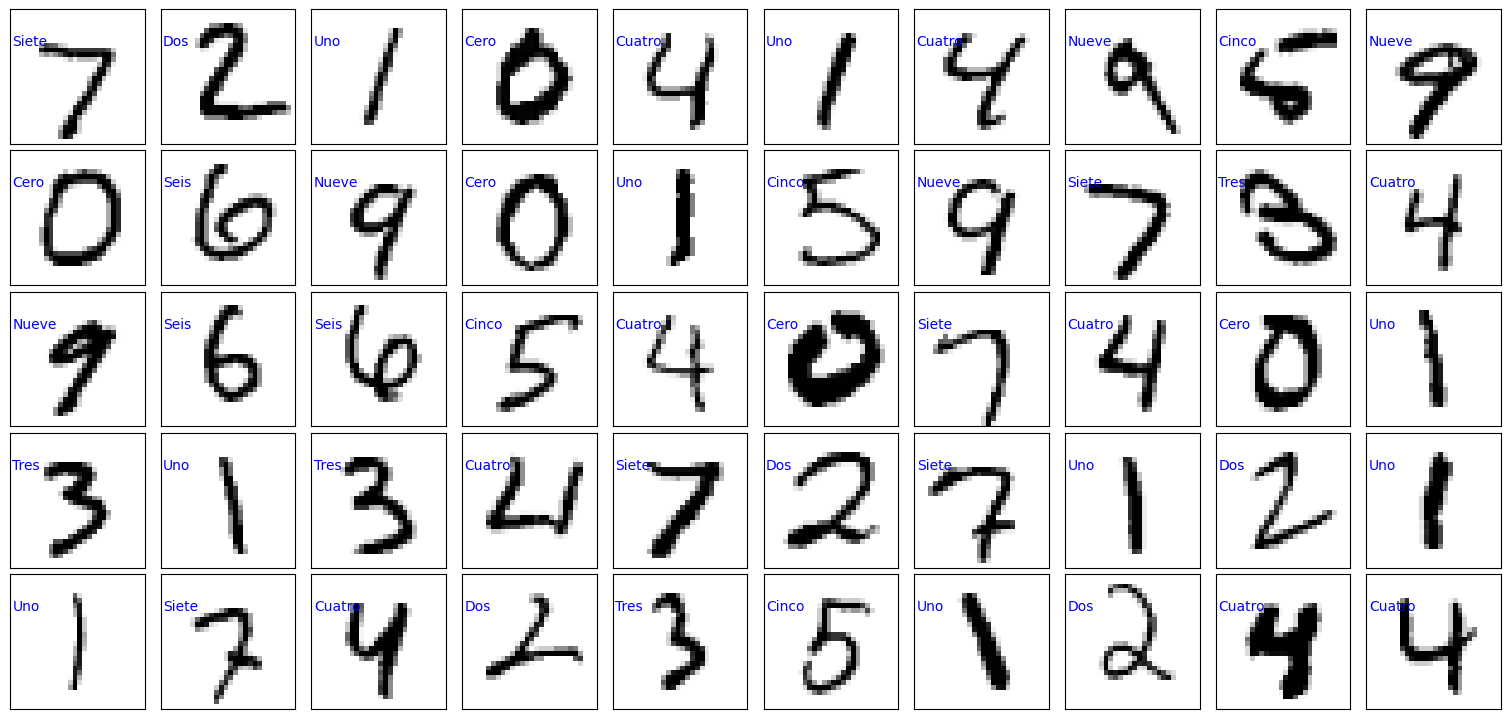

In [11]:
class_names = ['Cero', 'Uno', 'Dos', 'Tres', 'Cuatro',
                'Cinco', 'Seis', 'Siete', 'Ocho', 'Nueve']

y_pred = model.predict(x_test)
prediction_values=np.argmax(y_pred,axis=1)


fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(50):
  ax = fig.add_subplot(5, 10, i + 1, xticks=[], yticks=[])
  ax.imshow(x_test[i,:].reshape((28,28)),cmap=plt.cm.gray_r, interpolation='nearest')

  if prediction_values[i] == np.argmax(y_test[i]):
    ax.text(0, 7, class_names[prediction_values[i]], color='blue')
  else:
    ax.text(0, 7, class_names[prediction_values[i]], color='red')

# Actividad: usar el modelo LeNet previo para resolver el problema de classificación de prendas mostrado a continuación.

4422102/4422102 [==============================] - 0s 0us/step


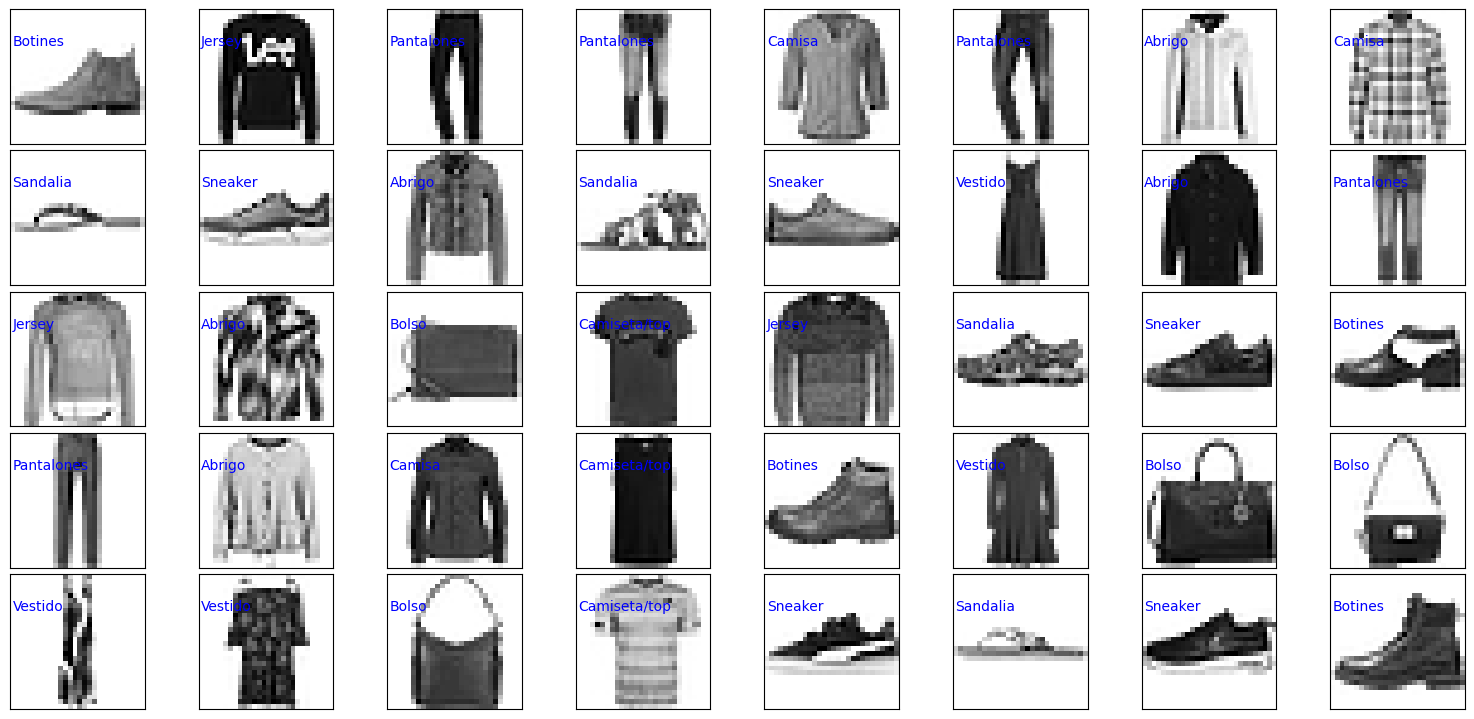

In [12]:
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()


class_names = ['Camiseta/top', 'Pantalones', 'Jersey', 'Vestido', 'Abrigo',
                'Sandalia', 'Camisa', 'Sneaker', 'Bolso', 'Botines']

fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(40):
  ax = fig.add_subplot(5, 8, i + 1, xticks=[], yticks=[])
  ax.imshow(x_test[i,:].reshape((28,28)),cmap=plt.cm.gray_r, interpolation='nearest')
  ax.text(0, 7, class_names[y_test[i]], color='blue')

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.5212 - accuracy: 0.8104 - val_loss: 0.4372 - val_accuracy: 0.8444
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3732 - accuracy: 0.8645 - val_loss: 0.3711 - val_accuracy: 0.8659
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3312 - accuracy: 0.8784 - val_loss: 0.3670 - val_accuracy: 0.8665
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3024 - accuracy: 0.8879 - val_loss: 0.3311 - val_accuracy: 0.8755
Epoch 5/5
313/313 [==============================] - 1s 2ms/step


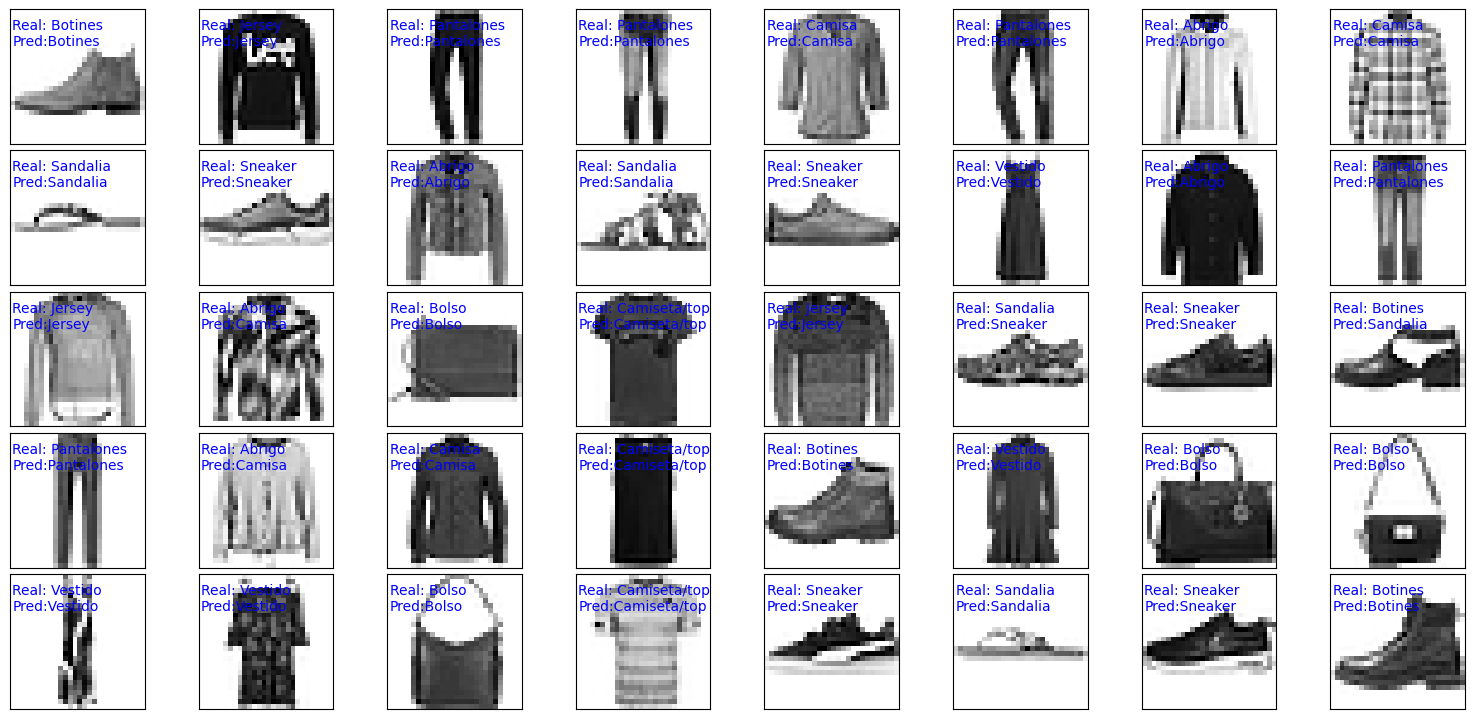

In [21]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D

from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

def load_and_preprocess_data():
    # Cargar los datos de Fashion MNIST
    (x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

    # Definir los nombres de las clases
    class_names = ['Camiseta/top', 'Pantalones', 'Jersey', 'Vestido','Abrigo', 'Sandalia', 'Camisa', 'Sneaker', 'Bolso', 'Botines']

    # Preprocesamiento de los datos
    num_classes = 10

    # Convertir clases a matrices one-hot
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)

    # Normalización
    x_train = x_train.astype('float32') / 255
    x_test = x_test.astype('float32') / 255

    # Agregar una dimensión
    x_train = x_train[..., np.newaxis]
    x_test = x_test[..., np.newaxis]

    return x_train, y_train, x_test, y_test, class_names

def create_model(input_shape, num_classes):
    # Crear una instancia del modelo LeNet
    model = LeNet(input_shape, num_classes)
    return model

def train_model(model, x_train, y_train, x_test, y_test, epochs):
    # Entrenar el modelo
    model.fit(x_train, y=y_train, epochs=epochs, validation_data=(x_test, y_test), verbose=1)

def predict_and_visualize(model, x_test, y_test, class_names):
    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(x_test)
    prediction_values = np.argmax(y_pred, axis=1)

    # Visualizar las imágenes de prueba con etiquetas y predicciones
    fig = plt.figure(figsize=(15, 7))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(40):
        ax = fig.add_subplot(5, 8, i + 1, xticks=[], yticks=[])
        ax.imshow(x_test[i, :].reshape((28, 28)), cmap=plt.cm.gray_r,interpolation='nearest')
        ax.text(0, 7, f"Real: {class_names[np.argmax(y_test[i])]}\nPred:{class_names[prediction_values[i]]}", color='blue')
    plt.show()

# En la parte principal del código
def main():
    x_train, y_train, x_test, y_test, class_names = load_and_preprocess_data()
    model = create_model(x_train[0].shape, 10)
    train_model(model, x_train, y_train, x_test, y_test, epochs=5)
    predict_and_visualize(model, x_test, y_test, class_names)

if __name__ == "__main__":
    main()
